# 0.Librerías

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler 
import hdbscan
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# 1. Clustering por producto

In [11]:
df = pd.read_csv("/Users/santi/Documents/csv/datos_arreglados.csv", index_col=0)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

df.head()

,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
date,,,,,,,,,,,
2013-07-08,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,0,0,12.7414,0.0000
2013-07-15,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,1,0,12.7414,0.0000
2013-07-22,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,29,2013,0,4,10.9858,43.9432
2013-07-29,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,30,2013,0,6,10.9858,65.9148
2013-08-05,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,31,2013,0,0,10.9858,0.0000


Con las variables que tenemos vamos a obtener el porcentaje de ventas por *quarter* y *region* de cada producto, el precio medio total por producto y la cantidad de unidades vendidas de cada uno.

In [12]:
# Filtramos el DataFrame para obtener solo los datos de la ciudad de Boston
df_boston = df[df['region'] == 'Boston'].copy()

# Creamos una columna 'quarter' a partir del índice 'date'
df_boston['quarter'] = df_boston.index.quarter 

# Calculamos los porcentajes de ventas por ítem para cada trimestre
df_boston = pd.crosstab(df_boston['item'], df_boston['quarter'], values=df_boston['total_sales'], aggfunc='sum', normalize='index')

# Renombramos las columnas de los trimestres
df_boston.columns = ['Boston_Q' + str(col) for col in df_boston.columns]

# El resultado df_boston es un DataFrame con los porcentajes normalizados por ítem y trimestre
df_boston.reset_index(inplace=True)

df_boston

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094
...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.289806,0.177665,0.216503,0.316026
3045,SUPERMARKET_3_824,0.222281,0.277452,0.319342,0.180925
3046,SUPERMARKET_3_825,0.326950,0.258387,0.230210,0.184453
3047,SUPERMARKET_3_826,0.267774,0.289019,0.237289,0.205918


In [13]:
# Filtramos el DataFrame para obtener ahora los datos de la ciudad de New York
df_ny = df[df['region'] == 'New York'].copy()

# Creamos una columna 'quarter' a partir del índice 'date'
df_ny['quarter'] = df_ny.index.quarter 

# Calculamos los porcentajes de ventas por ítem para cada trimestre
df_ny = pd.crosstab(df_ny['item'], df_ny['quarter'], values=df_ny['total_sales'], aggfunc='sum', normalize='index')

# Renombramos las columnas de los trimestres
df_ny.columns = ['New_York_Q' + str(col) for col in df_ny.columns]

# El resultado df_ny es un DataFrame con los porcentajes normalizados por ítem y trimestre
df_ny.reset_index(inplace=True)

df_ny

,item,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4
0,ACCESORIES_1_001,0.290651,0.185303,0.232997,0.291048
1,ACCESORIES_1_002,0.169339,0.190386,0.265158,0.375117
2,ACCESORIES_1_003,0.290550,0.256700,0.191819,0.260931
3,ACCESORIES_1_004,0.265228,0.256632,0.229645,0.248495
4,ACCESORIES_1_005,0.236569,0.200389,0.269576,0.293466
...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.279585,0.208005,0.270410,0.242001
3045,SUPERMARKET_3_824,0.219106,0.344857,0.232286,0.203751
3046,SUPERMARKET_3_825,0.275628,0.230843,0.293817,0.199712
3047,SUPERMARKET_3_826,0.247476,0.296081,0.255348,0.201095


In [14]:
# Filtramos el DataFrame para obtener solo los datos de la ciudad de Philadelphia
df_philadelphia = df[df['region'] == 'Philadelphia'].copy()

# Creamos una columna 'quarter' a partir del índice 'date'
df_philadelphia['quarter'] = df_philadelphia.index.quarter 

# Calculamos los porcentajes de ventas por ítem para cada trimestre
df_philadelphia = pd.crosstab(df_philadelphia['item'], df_philadelphia['quarter'], values=df_philadelphia['total_sales'], aggfunc='sum', normalize='index')

# Renombramos las columnas de los trimestres
df_philadelphia.columns = ['Philadelphia_Q' + str(col) for col in df_philadelphia.columns]

# El resultado df_philadelphia es un DataFrame con los porcentajes normalizados por ítem y trimestre
df_philadelphia.reset_index(inplace=True)

df_philadelphia

,item,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4
0,ACCESORIES_1_001,0.280930,0.204212,0.247872,0.266986
1,ACCESORIES_1_002,0.217307,0.173846,0.250679,0.358168
2,ACCESORIES_1_003,0.326288,0.265655,0.222862,0.185195
3,ACCESORIES_1_004,0.286508,0.265151,0.221110,0.227232
4,ACCESORIES_1_005,0.260617,0.192501,0.215559,0.331322
...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.307594,0.198021,0.215576,0.278808
3045,SUPERMARKET_3_824,0.222398,0.321861,0.289589,0.166152
3046,SUPERMARKET_3_825,0.320260,0.251718,0.228474,0.199548
3047,SUPERMARKET_3_826,0.211521,0.293508,0.251753,0.243219


In [15]:
# Hacemos un merge entre df_boston y df_ny
df_merge = pd.merge(df_boston, df_ny, on='item', how='outer')

# Luego, hacemos un merge del resultado anterior con df_philadelphia
df_merge = pd.merge(df_merge, df_philadelphia, on='item', how='outer')

df_merge.head()

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322


In [16]:
# Calculamos el total de unidades vendidas por 'item'
total_sales_by_item = df.groupby('item')['units_sold'].sum().reset_index(name='total_units_sold')

# Calculamos el precio medio total por 'item'
average_price_by_item = df.groupby('item')['sell_price'].mean().reset_index(name='avg_sell_price')

# Realizamos un merge para agregar las ventas totales por 'item'
df_merge = pd.merge(df_merge, total_sales_by_item, on='item', how='left')

# Realizamos otro merge para agregar el precio medio total por 'item'
df_final_item_region = pd.merge(df_merge, average_price_by_item, on='item', how='left')

df_final_item_region.head()

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986,4051,11.039091
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168,5047,5.276618
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195,1405,3.944072
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232,38996,5.981629
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322,14529,3.833931


/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_4228/1120532068.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final_item_region.corr(), annot=True, cmap="YlGnBu");


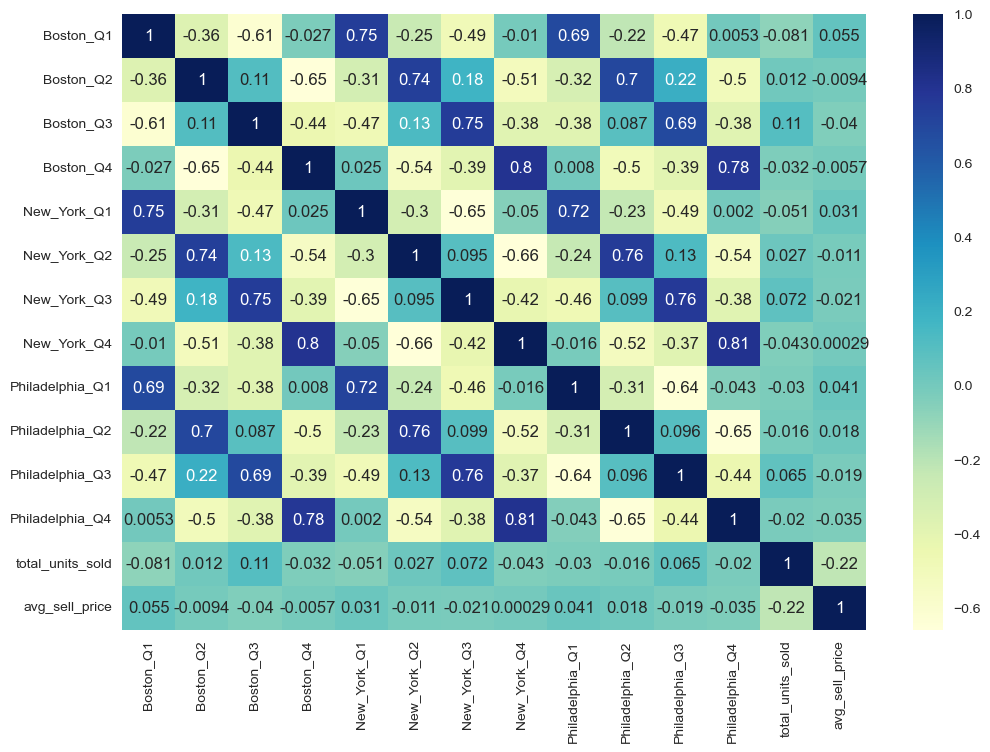

In [17]:
# Obtenemos la correlación de las diferentes variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_final_item_region.corr(), annot=True, cmap="YlGnBu");

In [18]:
df_cluster_product_region= df_final_item_region.copy()

In [19]:
# Guardamos la variable 'ítem'
productos_region = df_cluster_product_region.pop('item')
productos_region

0        ACCESORIES_1_001
1        ACCESORIES_1_002
2        ACCESORIES_1_003
3        ACCESORIES_1_004
4        ACCESORIES_1_005
              ...        
3044    SUPERMARKET_3_823
3045    SUPERMARKET_3_824
3046    SUPERMARKET_3_825
3047    SUPERMARKET_3_826
3048    SUPERMARKET_3_827
Name: item, Length: 3049, dtype: object

In [20]:
# Estandarizamos las variables
ss = StandardScaler()
df_cluster_product_region_ss = pd.DataFrame(
    ss.fit_transform(df_cluster_product_region),
    columns= df_cluster_product_region.columns)

df_cluster_product_region_ss

,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price
0,-0.222054,-0.704803,-0.164482,0.972622,0.558720,-1.354499,-0.276860,0.896965,0.102832,-0.823106,0.200043,0.410154,-0.394344,1.206081
1,-1.279305,-0.268709,0.286179,1.135713,-1.852262,-1.245623,0.347982,2.424325,-1.069016,-1.429579,0.250008,1.943356,-0.371743,-0.063860
2,-0.298388,-0.055345,1.160120,-0.728219,0.556708,0.174859,-1.076884,0.349790,0.938264,0.404003,-0.245146,-0.965125,-0.454387,-0.357528
3,-0.255645,0.144504,-0.081098,0.176399,0.053451,0.173416,-0.341981,0.123847,0.205568,0.393936,-0.276342,-0.258293,0.398622,0.091511
4,-1.155453,-0.722332,0.532581,1.202726,-0.516113,-1.031358,0.433819,0.940884,-0.271296,-1.056991,-0.375139,1.491942,-0.156579,-0.381801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0.372363,-1.440872,-0.444037,1.338813,0.338780,-0.868220,0.450011,0.005874,0.593960,-0.946756,-0.374840,0.608947,-0.139311,-0.489608
3045,-0.909357,0.494247,1.511108,-0.978943,-0.863191,2.063254,-0.290667,-0.689061,-0.975244,1.526539,0.942617,-1.285335,-0.297586,-0.559770
3046,1.077427,0.124528,-0.183446,-0.918409,0.260145,-0.379010,0.904785,-0.762433,0.827245,0.125655,-0.145255,-0.723783,-0.180723,-0.139359
3047,-0.045831,0.718560,-0.048850,-0.550171,-0.299362,1.018431,0.157392,-0.737304,-1.175588,0.960277,0.269115,0.010515,-0.211221,-0.888269


Probamos con HDBSCAN...

In [21]:
# Inicializamos el algoritmo HDBSCAN 
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=5)
# Ajustamos el modelo y predecimos las etiquetas de clúster
cluster_labels = clusterer.fit_predict(df_cluster_product_region_ss)
# Agregamos las etiquetas del clúster al DataFrame original
df_final_item_region['cluster_hdbscan'] = cluster_labels

df_final_item_region

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price,cluster_hdbscan
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986,4051,11.039091,0
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168,5047,5.276618,-1
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195,1405,3.944072,0
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232,38996,5.981629,0
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322,14529,3.833931,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,0.289806,0.177665,0.216503,0.316026,0.279585,0.208005,0.270410,0.242001,0.307594,0.198021,0.215576,0.278808,15290,3.344748,0
3045,SUPERMARKET_3_824,0.222281,0.277452,0.319342,0.180925,0.219106,0.344857,0.232286,0.203751,0.222398,0.321861,0.289589,0.166152,8315,3.026382,0
3046,SUPERMARKET_3_825,0.326950,0.258387,0.230210,0.184453,0.275628,0.230843,0.293817,0.199712,0.320260,0.251718,0.228474,0.199548,13465,4.934034,0
3047,SUPERMARKET_3_826,0.267774,0.289019,0.237289,0.205918,0.247476,0.296081,0.255348,0.201095,0.211521,0.293508,0.251753,0.243219,12121,1.535787,0


In [22]:
df_final_item_region.cluster_hdbscan.value_counts()

 0    2424
-1     620
 1       5
Name: cluster_hdbscan, dtype: int64

Hacemos una segunda iteración con KMeans...

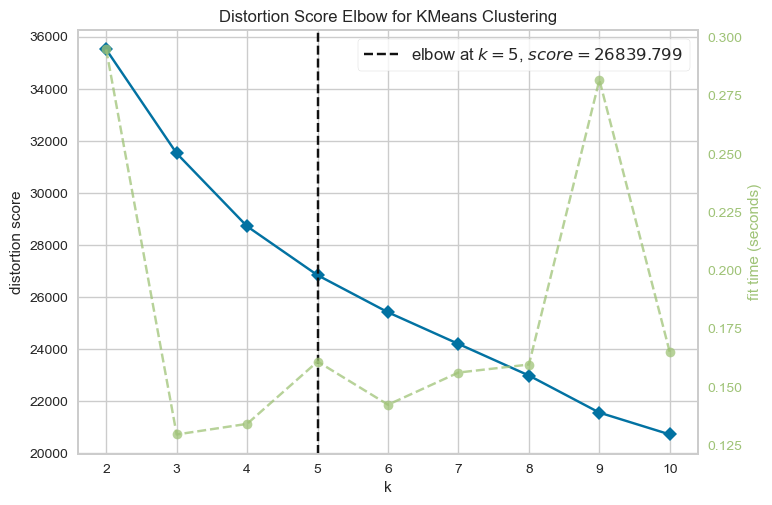

In [23]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42, init="random", n_init="auto"), k=10)
Elbow_M.fit(df_cluster_product_region_ss)
Elbow_M.show();

In [24]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init="auto")
    kmeans.fit(df_cluster_product_region_ss)
    silhouette_scores.append(silhouette_score(df_cluster_product_region_ss, kmeans.labels_))

fig = px.line(
    x=range(2, 10),
    y=silhouette_scores,
    title="Silhouette score",
    labels={"x": "k", "y": "Silhouette score"},
)
fig.show()

In [25]:
kmeans= KMeans(n_clusters=3,random_state=42, init="random", n_init="auto")
kmeans.fit(df_cluster_product_region_ss)
df_final_item_region["cluster_kmeans"] = kmeans.labels_

/Users/santi/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



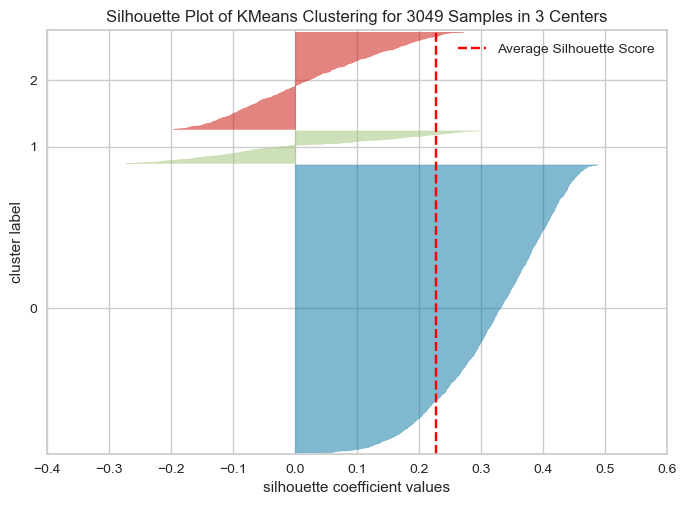

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3049 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_cluster_product_region_ss)  
visualizer.show()

In [27]:
df_final_item_region.head()

,item,Boston_Q1,Boston_Q2,Boston_Q3,Boston_Q4,New_York_Q1,New_York_Q2,New_York_Q3,New_York_Q4,Philadelphia_Q1,Philadelphia_Q2,Philadelphia_Q3,Philadelphia_Q4,total_units_sold,avg_sell_price,cluster_hdbscan,cluster_kmeans
0,ACCESORIES_1_001,0.258490,0.215622,0.231207,0.294681,0.290651,0.185303,0.232997,0.291048,0.280930,0.204212,0.247872,0.266986,4051,11.039091,0,2
1,ACCESORIES_1_002,0.202792,0.238109,0.254912,0.304187,0.169339,0.190386,0.265158,0.375117,0.217307,0.173846,0.250679,0.358168,5047,5.276618,-1,0
2,ACCESORIES_1_003,0.254469,0.249112,0.300880,0.195539,0.290550,0.256700,0.191819,0.260931,0.326288,0.265655,0.222862,0.185195,1405,3.944072,0,0
3,ACCESORIES_1_004,0.256721,0.259417,0.235593,0.248269,0.265228,0.256632,0.229645,0.248495,0.286508,0.265151,0.221110,0.227232,38996,5.981629,0,0
4,ACCESORIES_1_005,0.209317,0.214718,0.267872,0.308094,0.236569,0.200389,0.269576,0.293466,0.260617,0.192501,0.215559,0.331322,14529,3.833931,0,0


Una vez analizados los datos obtenidos, decidimos optar mejor por el porcentaje de ventas totales por *quarter* de cada producto, el precio medio total por producto y la cantidad de unidades vendidas de cada uno, ya que nos parecen variables más representativas.

In [28]:
# Creamos un diccionario para mapear los nombres de las columnas
quarter_names = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

# Creamos una columna 'quarter' a partir del índice 'date' y aplicamos el mapeo
df['quarter'] = (df.index.month - 1) // 3 + 1
df['quarter'] = df['quarter'].map(quarter_names)

# Calculamos los porcentajes de ventas por ítem y trimestre
df_perc_quarter_item = pd.crosstab(df['item'], df['quarter'], values=df['total_sales'], aggfunc='sum', normalize='index')

# Calculamos las unidades totales vendidas por ítem
units_total = df.groupby('item')['units_sold'].sum()

# Calculamos el precio medio por ítem
avg_price = df.groupby('item').apply(lambda x: (x['total_sales'].sum() / x['units_sold'].sum()))

# Convertimos las Series en DataFrames para unirlos más fácilmente después
units_total_by_item_df = units_total.reset_index(name='units_total')
average_price_by_item_df = avg_price.reset_index(name='avg_price')

# Unimos los DataFrames para tener todos los datos juntos
df_final = df_perc_quarter_item.reset_index()  
df_final = df_final.merge(units_total_by_item_df, on='item')
df_final = df_final.merge(average_price_by_item_df, on='item')

df_final.head()

,item,Q1,Q2,Q3,Q4,units_total,avg_price
0,ACCESORIES_1_001,0.281263,0.195372,0.234402,0.288963,4051,11.000712
1,ACCESORIES_1_002,0.199654,0.190240,0.255982,0.354124,5047,5.279317
2,ACCESORIES_1_003,0.289062,0.256714,0.227942,0.226282,1405,3.938599
3,ACCESORIES_1_004,0.266751,0.258757,0.229655,0.244836,38996,6.006287
4,ACCESORIES_1_005,0.234197,0.202624,0.257898,0.305281,14529,3.807422


/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_4228/3438307196.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



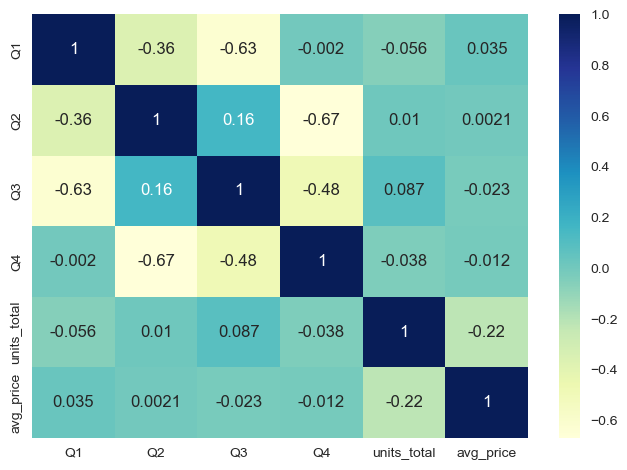

In [29]:
# Obtenemos la correlación de las diferentes variables
sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu");

Ya que ninguna variable tiene una alta correlación entre sí, no vamos a proceder a eliminar ninguna.

In [30]:
df_cluster_product= df_final.copy()

In [31]:
# Guardamos la variable 'ítem'
productos = df_cluster_product.pop('item')
productos

0        ACCESORIES_1_001
1        ACCESORIES_1_002
2        ACCESORIES_1_003
3        ACCESORIES_1_004
4        ACCESORIES_1_005
              ...        
3044    SUPERMARKET_3_823
3045    SUPERMARKET_3_824
3046    SUPERMARKET_3_825
3047    SUPERMARKET_3_826
3048    SUPERMARKET_3_827
Name: item, Length: 3049, dtype: object

In [32]:
# Cambiamos todos los nombres de las columnas a strings
df_cluster_product.columns = df_cluster_product.columns.astype(str)
# Estandarizamos las características
ss = StandardScaler()
df_cluster_product_ss = pd.DataFrame(
    ss.fit_transform(df_cluster_product),
    columns= df_cluster_product.columns)

df_cluster_product_ss

,Q1,Q2,Q3,Q4,units_total,avg_price
0,0.294480,-1.202115,-0.168496,0.907702,-0.394344,1.203613
1,-1.474984,-1.317252,0.285475,2.139800,-0.371743,-0.060003
2,0.463571,0.174213,-0.304391,-0.277493,-0.454387,-0.356112
3,-0.020167,0.220060,-0.268369,0.073347,0.398622,0.100554
4,-0.726012,-1.039404,0.325791,1.216253,-0.156579,-0.385083
...,...,...,...,...,...,...
3044,0.402209,-1.059728,0.210600,0.353026,-0.139311,-0.495808
3045,-1.021481,1.728044,0.451166,-0.970990,-0.297586,-0.551936
3046,0.737654,-0.110570,0.345690,-0.860815,-0.180723,-0.151334
3047,-0.540336,1.002684,0.157753,-0.515575,-0.211221,-0.886764


Probamos con HDBSCAN...

In [33]:
# Inicializamos el algoritmo HDBSCAN 
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=5)
# Ajustamos el modelo y predecimos las etiquetas de clúster
cluster_labels = clusterer.fit_predict(df_cluster_product_ss)

pd.Series(cluster_labels).value_counts()

 1    2307
-1     737
 0       5
dtype: int64

Los clusters obtenidos no nos aportan mucha información ya que más del 20% de los datos los califica como ruido, y engloba más del 90% restante en un solo grupo.
Decidimos por ello probar una segunda iteración con Kmeans...

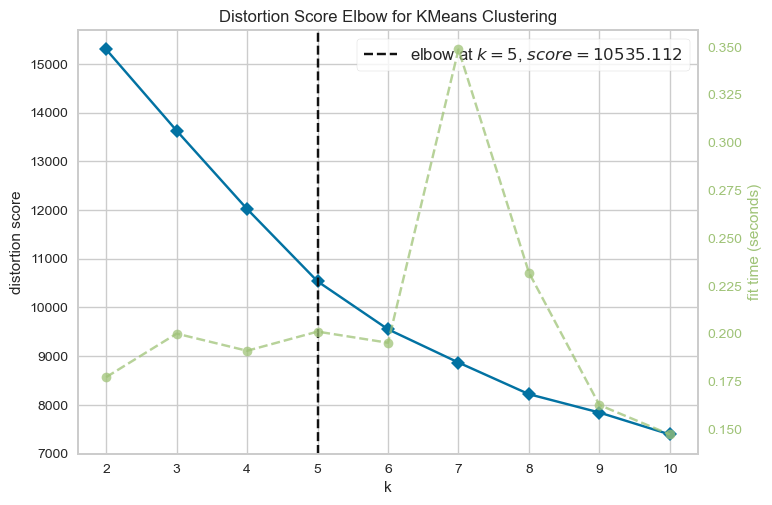

In [34]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42, init="random", n_init="auto"), k=10)
Elbow_M.fit(df_cluster_product_ss)
Elbow_M.show();

In [35]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init="auto")
    kmeans.fit(df_cluster_product_ss)
    silhouette_scores.append(silhouette_score(df_cluster_product_ss, kmeans.labels_))

fig = px.line(
    x=range(2, 10),
    y=silhouette_scores,
    title="Silhouette score",
    labels={"x": "k", "y": "Silhouette score"},
)
fig.show()

In [36]:
kmeans= KMeans(n_clusters=5,random_state=42, init="random", n_init="auto")
kmeans.fit(df_cluster_product_ss)
df_final["cluster_kmeans"] = kmeans.labels_

/Users/santi/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



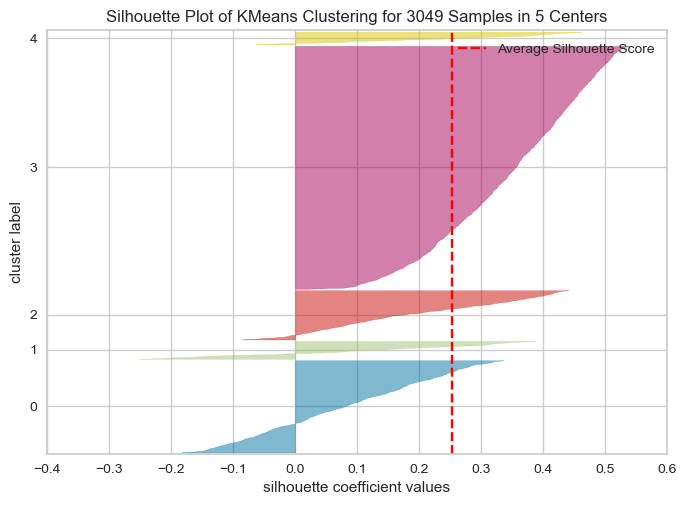

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3049 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_cluster_product_ss)  
visualizer.show()

In [38]:
df_final.head()

,item,Q1,Q2,Q3,Q4,units_total,avg_price,cluster_kmeans
0,ACCESORIES_1_001,0.281263,0.195372,0.234402,0.288963,4051,11.000712,2
1,ACCESORIES_1_002,0.199654,0.190240,0.255982,0.354124,5047,5.279317,3
2,ACCESORIES_1_003,0.289062,0.256714,0.227942,0.226282,1405,3.938599,3
3,ACCESORIES_1_004,0.266751,0.258757,0.229655,0.244836,38996,6.006287,3
4,ACCESORIES_1_005,0.234197,0.202624,0.257898,0.305281,14529,3.807422,3


In [39]:
# Calculamos los centroides 
df_centroides= pd.DataFrame(kmeans.cluster_centers_,columns=kmeans.feature_names_in_)
df_centroides['Centroide'] = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
df_centroides.set_index('Centroide', inplace=True)

df_centroides

,Q1,Q2,Q3,Q4,units_total,avg_price
Centroide,,,,,,
Cluster 1,0.849733,-0.676020,-1.043919,0.766960,-0.197905,-0.179532
Cluster 2,-1.558912,2.365782,1.800787,-2.252805,-0.171767,0.121676
Cluster 3,0.076144,-0.027137,-0.018194,-0.027181,-0.301642,2.058300
Cluster 4,-0.208445,0.084962,0.241595,-0.106969,-0.064653,-0.314259
Cluster 5,-0.267998,0.038667,0.474571,-0.225421,4.055215,-0.840264


In [40]:
# Desestandarizamos las variables
df_centroides= pd.DataFrame(
    ss.inverse_transform(df_centroides),
    columns= df_cluster_product.columns)

df_centroides

,Q1,Q2,Q3,Q4,units_total,avg_price
0,0.306872,0.218820,0.192789,0.281519,12707.805022,4.738117
1,0.195783,0.354391,0.328012,0.121814,13859.666667,6.101925
2,0.271193,0.247740,0.241547,0.239520,8136.273481,14.870561
3,0.258068,0.252736,0.253896,0.235300,18580.071188,4.128101
4,0.255321,0.250673,0.264970,0.229036,200137.372340,1.746458


Procedemos a visualizar los centroides comparando todas las variables de *df_cluster_product_ss.* *Q1* y *Q2* por un lado, *Q3* y *Q4* por otro, y *units_total* con *avg_price* en una última gráfica.

/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_4228/4077006465.py:13: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



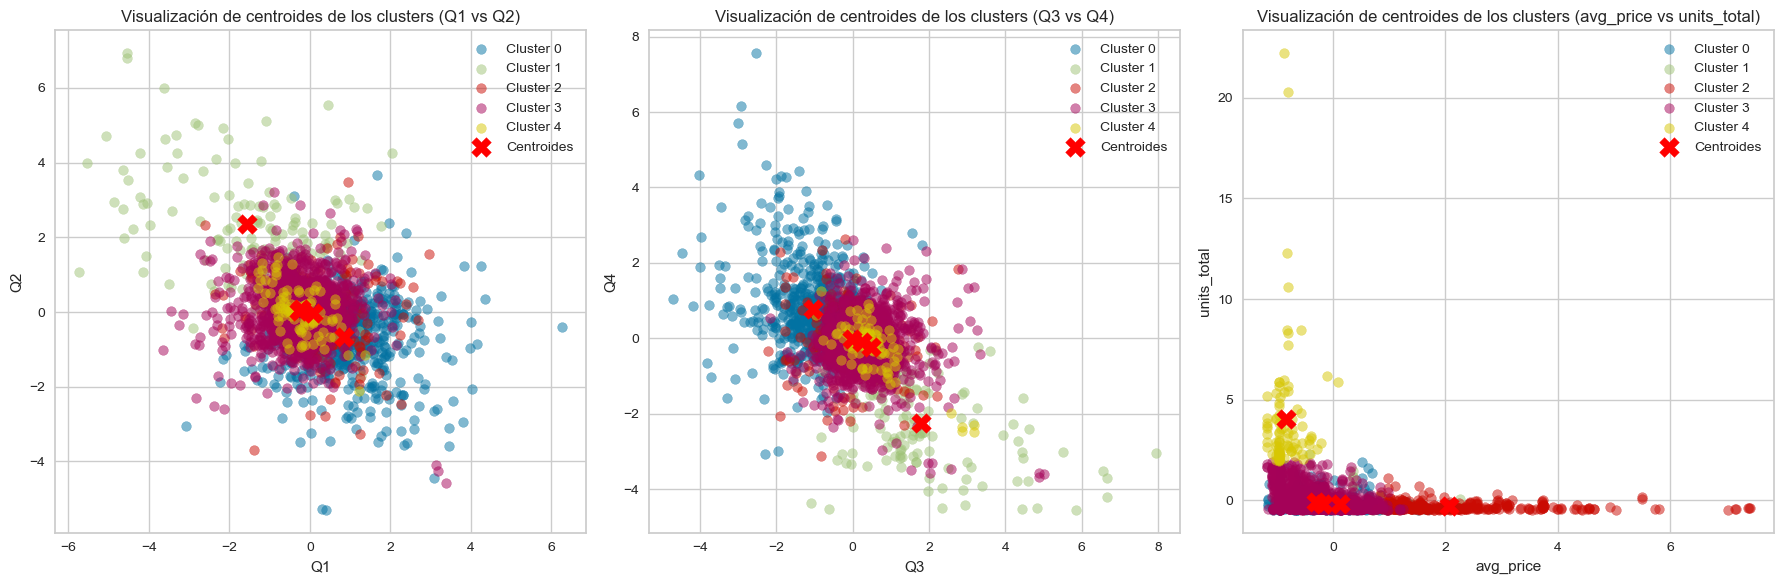

In [41]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Definimos los títulos y las columnas para cada subplot
titles = ['Q1 vs Q2', 'Q3 vs Q4', 'avg_price vs units_total']
columns = [(0, 1), (2, 3), (5, 4)]

for i, ax in enumerate(axs):
    # Graficamos los puntos de datos
    for j in range(kmeans.n_clusters):
        ax.scatter(
            df_cluster_product_ss.iloc[labels == j, columns[i][0]],
            df_cluster_product_ss.iloc[labels == j, columns[i][1]],
            label=f'Cluster {j}',
            cmap='viridis',
            marker='o',
            alpha=0.5
        )

    # Graficamos los centroides
    ax.scatter(
        centroids[:, columns[i][0]],
        centroids[:, columns[i][1]],
        c='red',
        marker='X',
        s=200,
        label='Centroides'
    )

    ax.set_title(f'Visualización de centroides de los clusters ({titles[i]})')
    ax.set_xlabel(df_cluster_product_ss.columns[columns[i][0]])
    ax.set_ylabel(df_cluster_product_ss.columns[columns[i][1]])

    ax.legend()

plt.tight_layout()
plt.show()


Analizamos los clusters mediante boxplots para sacar mejores conclusiones de cada uno de ellos.

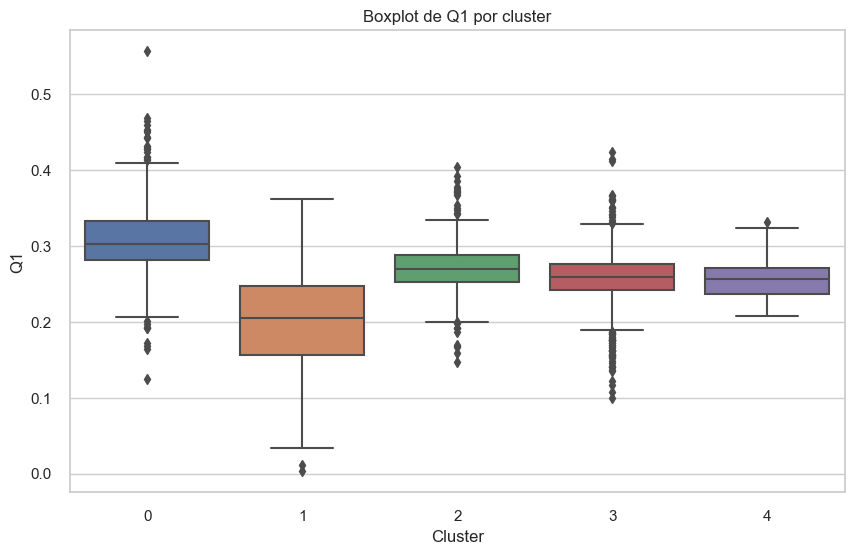

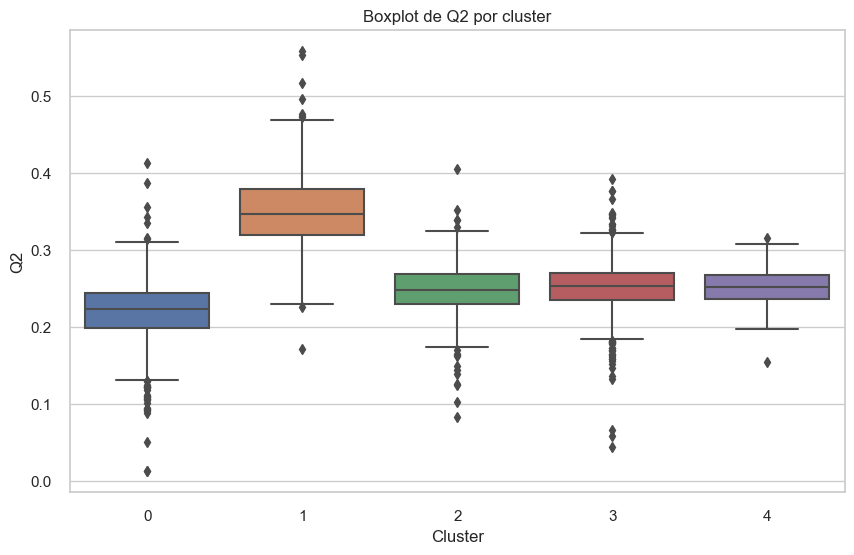

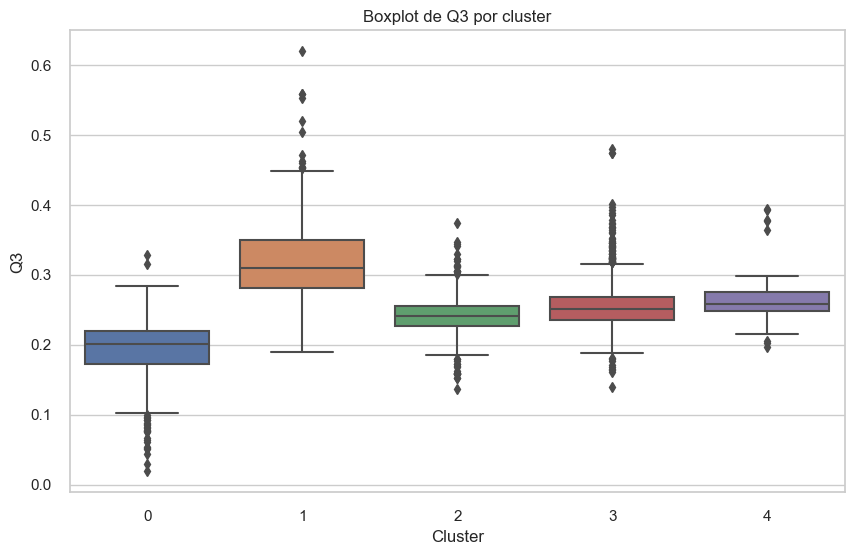

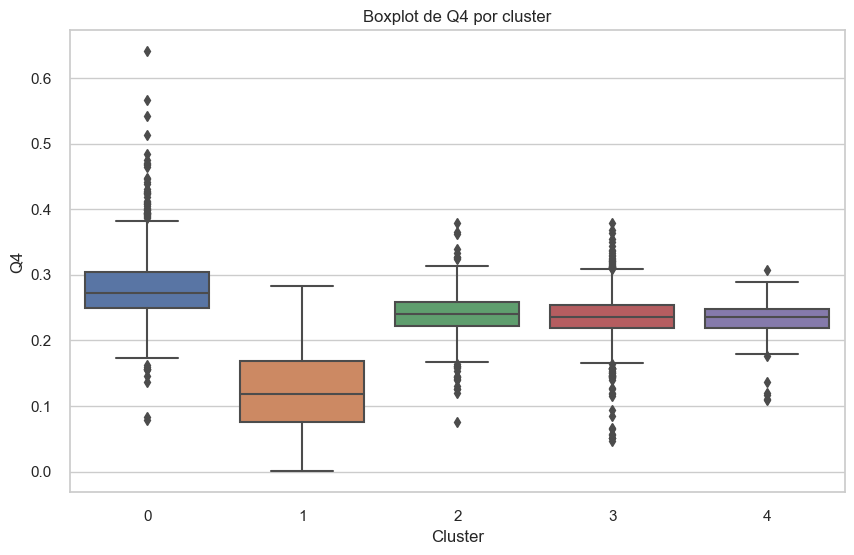

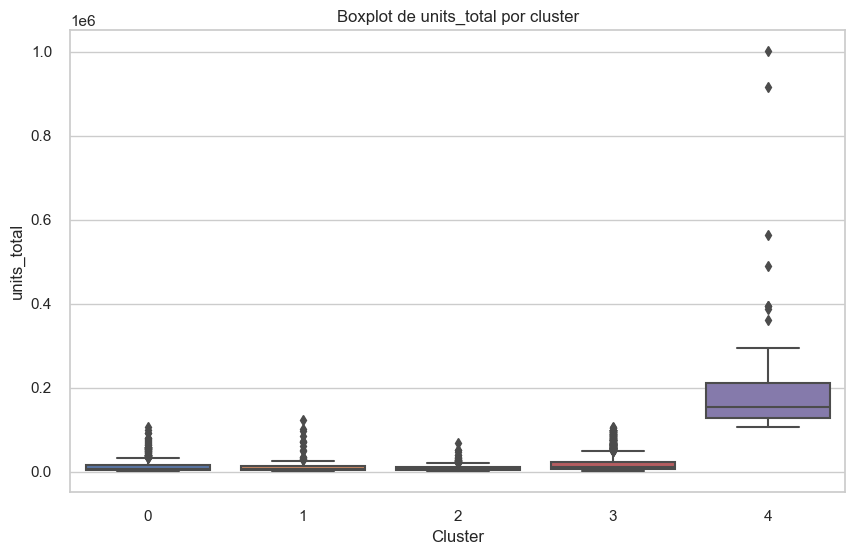

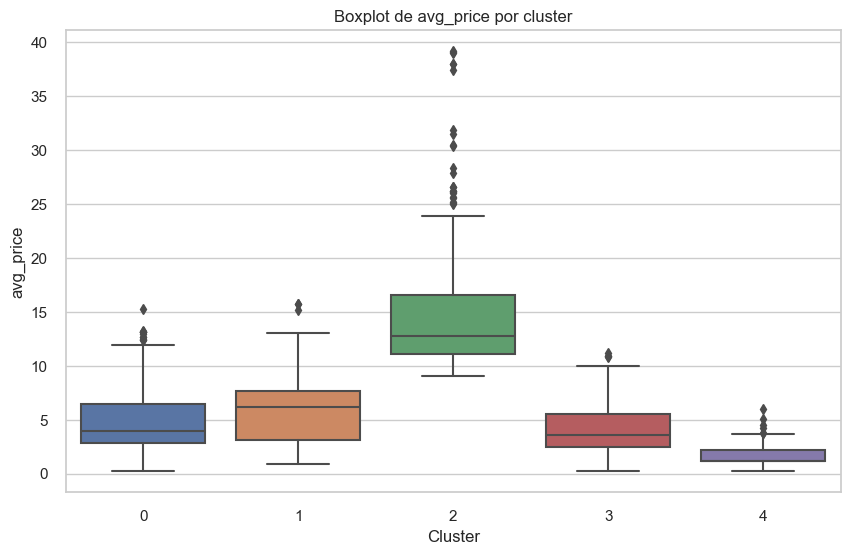

In [42]:
# Establecemos el estilo de los gráficos
sns.set(style="whitegrid")

# Creamos un boxplot para cada variable en función del cluster
for variable in ['Q1', 'Q2', 'Q3', 'Q4', 'units_total', 'avg_price']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_kmeans', y=variable, data=df_final)
    plt.title(f'Boxplot de {variable} por cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.show()


In [46]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=3)

df_pca = pd.DataFrame(data= pca.fit_transform(df_cluster_product_ss),
                  columns=[f"PCA_{i}" for i in range(1,4)])


In [47]:
df_pca

,PCA_1,PCA_2,PCA_3
0,-1.364959,-0.421584,-1.178804
1,-0.977505,1.376360,-2.348774
2,-0.166103,-0.393506,0.501840
3,-0.027318,0.087872,0.228264
4,-0.648807,1.102821,-1.259070
...,...,...,...
3044,-0.777092,0.549432,-0.189090
3045,2.051406,-0.266398,0.354400
3046,0.226191,-0.412221,0.611574
3047,1.103761,0.134845,0.461952


In [70]:
labels= kmeans.labels_
labels

array([2, 3, 3, ..., 3, 3, 0], dtype=int32)

In [71]:
labels.reshape(-1, 1)

array([[2],
       [3],
       [3],
       ...,
       [3],
       [3],
       [0]], dtype=int32)

In [72]:
df_pca["cluster"] = labels.reshape(-1, 1)

In [73]:
df_pca

,PCA_1,PCA_2,PCA_3,cluster
0,-1.364959,-0.421584,-1.178804,2
1,-0.977505,1.376360,-2.348774,3
2,-0.166103,-0.393506,0.501840,3
3,-0.027318,0.087872,0.228264,3
4,-0.648807,1.102821,-1.259070,3
...,...,...,...,...
3044,-0.777092,0.549432,-0.189090,3
3045,2.051406,-0.266398,0.354400,3
3046,0.226191,-0.412221,0.611574,3
3047,1.103761,0.134845,0.461952,3


In [120]:
centroides_pca= pd.DataFrame(pca.transform(centroids),columns=[f"PCA_{i}" for i in range(1,4)])
centroides_pca.head()

/Users/santi/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



,PCA_1,PCA_2,PCA_3
0,-1.672689,-0.027672,0.277375
1,3.966129,-0.757762,0.126447
2,-0.141049,-1.412388,-0.888627
3,0.322847,0.197322,-0.022220
4,0.893426,2.957661,1.668603


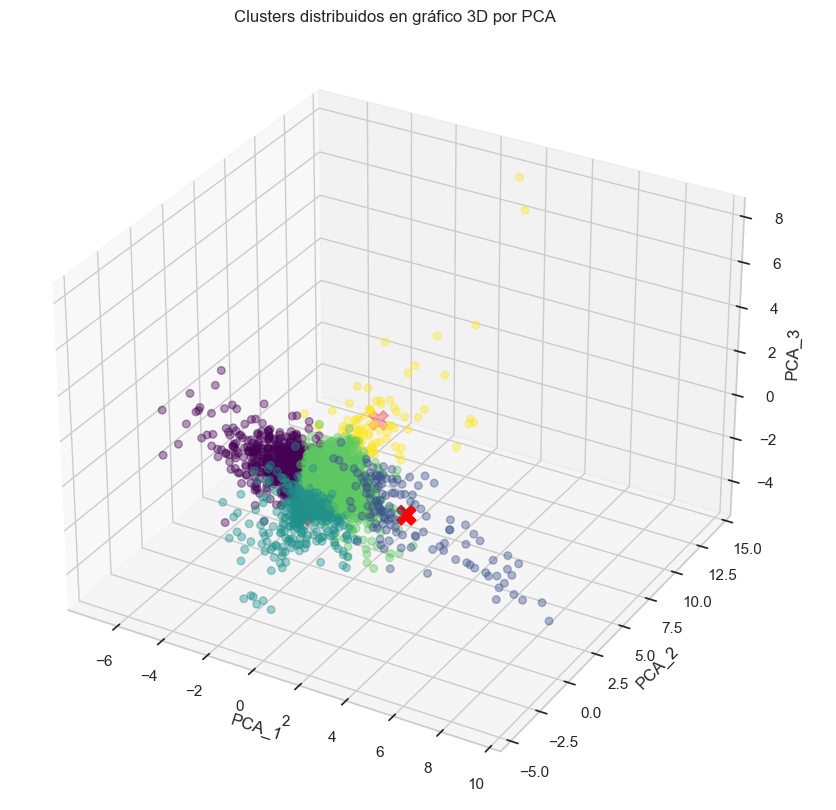

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = df_pca['PCA_1']
y = df_pca['PCA_2']
z = df_pca['PCA_3']
clusters = df_pca['cluster']

a=centroides_pca['PCA_1']
b= centroides_pca['PCA_2']
d= centroides_pca['PCA_3']


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d', label="bla")


scatter = ax.scatter(x, y, z, s=30, c=clusters, marker='o', alpha=0.4, cmap='viridis',zorder=1)

scatter_centro= ax.scatter( a, b ,d,c='red',marker='X',s=200,zorder=2)


ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title('Clusters distribuidos en gráfico 3D por PCA')

clusters_unicos = df_pca['cluster'].unique()
leyenda = []
for i, cluster in enumerate(clusters_unicos):
    leyenda.append(f"Cluster {cluster}")

# Crear la leyenda y ajustar la posición fuera del área del gráfico
plt.legend(leyenda, loc='upper left', mode="expand",bbox_to_anchor=(1.05, 1))

# Mostrar el gráfico
plt.show()


Se han realizado esfuerzos para que los centroides se visualicen claramente por encima de la nube de puntos. Sin embargo, la alta densidad de la nube dificulta su correcta visualización. Por ello, se ha optado por limitar el espacio en el siguiente gráfico para facilitar la localización de los centroides.



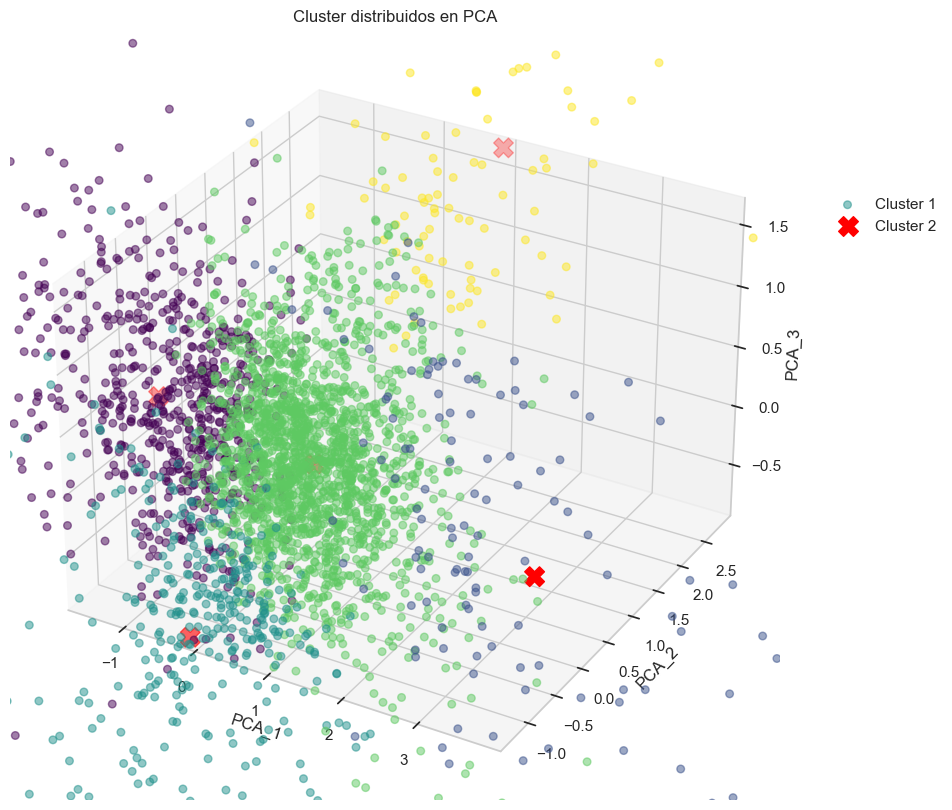

In [143]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df_pca['PCA_1']
y = df_pca['PCA_2']
z = df_pca['PCA_3']
clusters = df_pca['cluster']

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d', label="bla")

# Scatter plot 1 (scatter)
scatter1 = ax.scatter(x, y, z, s=30, c=clusters, marker='o', cmap='viridis', alpha=0.5)

# Suponiendo que 'a', 'b', y 'd' son tus datos para el segundo scatter plot
scatter2 = ax.scatter(a, b, d, c='red', marker='X', s=200)

# Obtener los límites de los datos del segundo scatter plot
xlim = (min(a), max(a))
ylim = (min(b), max(b))
zlim = (min(d), max(d))

# Establecer los límites del gráfico
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)

ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title('Cluster distribuidos en PCA')

# Crear la leyenda y ajustar la posición manualmente
plt.legend(['Cluster 1', 'Cluster 2'], loc='upper left', bbox_to_anchor=(1.05, 0.8))

# Mostrar el gráfico
plt.show()

## **Análisis detallado de los clusters:**
### **Cluster 0:**
- Este cluster muestra un pico de ventas en el primer trimestre (Q1), con un notable descenso en ventas en el tercer trimestre (Q3), lo que puede indicar una estacionalidad en la demanda de estos productos, posiblemente relacionada con el invierno y la primavera.
- Se sitúa entre los tres clusters con productos de menor precio medio, lo que sugiere que son más accesibles económicamente.
- La combinación de un precio medio bajo y un patrón de ventas estacional podría estar asociada a productos estacionales de uso común en los periodos más fríos del año.

### **Cluster 1:**
- Las ventas en este cluster disminuyen significativamente durante el primer y último trimestre del año, mientras que se mantienen más estables y elevadas en los trimestres intermedios (Q2 y Q3).
- Este patrón podría reflejar una preferencia por productos relacionados con actividades de primavera y verano, períodos en los que se observan las ventas más altas.
- Puede ser que estos productos tengan una demanda que responde a las temporadas cálidas, como artículos para actividades al aire libre o de temporada.

### **Cluster 2:**
- Presenta un sorprendente nivel de consistencia en ventas a lo largo de los cuatro trimestres, señalando una demanda constante durante todo el año.
- A pesar de tener el precio medio más alto entre los clusters, lo cual generalmente conduce a un volumen de ventas menor, este grupo mantiene ventas regulares, lo que podría indicar que los productos son de alta calidad, lujo o especializados.
- Los productos de este cluster podrían ser considerados artículos de lujo o no esenciales, cuya demanda no se ve afectada significativamente por cambios estacionales.

### **Cluster 3:**
- Exhibe un patrón de ventas uniforme y sostenido en todos los trimestres, lo que sugiere que los productos de este cluster tienen una demanda constante a lo largo del año.
- Registra el segundo volumen más alto de ventas y se posiciona como el segundo cluster con los productos más asequibles.
- Estas características sugieren que los productos de este cluster podrían ser bienes de consumo diario o necesidades básicas que son esenciales para los consumidores.

### **Cluster 4:**
- Las ventas se distribuyen de manera equitativa a lo largo de todo el año, lo que indica una ausencia de estacionalidad y una demanda constante.
- Este cluster destaca por tener el volumen más alto de ventas y el precio medio más bajo, lo que refuerza la noción de que se trata de productos de primera necesidad.
- Los productos de este cluster son probablemente bienes esenciales con una relación calidad-precio que favorece su alto volumen de ventas, como bienes de consumo masivo o productos básicos.


In [44]:
df_final.to_csv("clusteringproducto.csv")